# **Titanic Survival Data Analysis**

The most infamous shipwreck in human history is undoubtedly the sinking of the Titanic. <br>

On April 15th, 1912, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg, resulting in majority of the passengers getting killed. While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others. <br>

This project aims to see which groups of people were more likely to survive by analyzing [Titanic Survival Data](https://www.kaggle.com/datasets/yasserh/titanic-dataset/data) found through kaggle. <br>

The following sections are outlined as follows:
-   Cleaning the Data
-   Descriptive Analysis
    -   A. Passenger Survival Rate
    -   B. Age Survival Rate
    -   C. Gender Survival Rate
    -   D. Ticket Class Survival Rate
-   Inferential Analysis
    -   A. Age
    -   B. Gender
    -   C. Ticket Class
-   Summary and Conclusion

## **Cleaning the Data**

In [1]:
# Importing Modules

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Loading in Dataset
df = pd.read_csv("Titanic-Dataset.csv")

In [3]:
# Printing first four values
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Printing first four values
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# General stats from our set
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## **Descriptive Analysis**

### **A. Passenger Survival Rate:**

We can start by comparing how many passengers in this sample did not survive the Titanic, to how many passengers who did:  

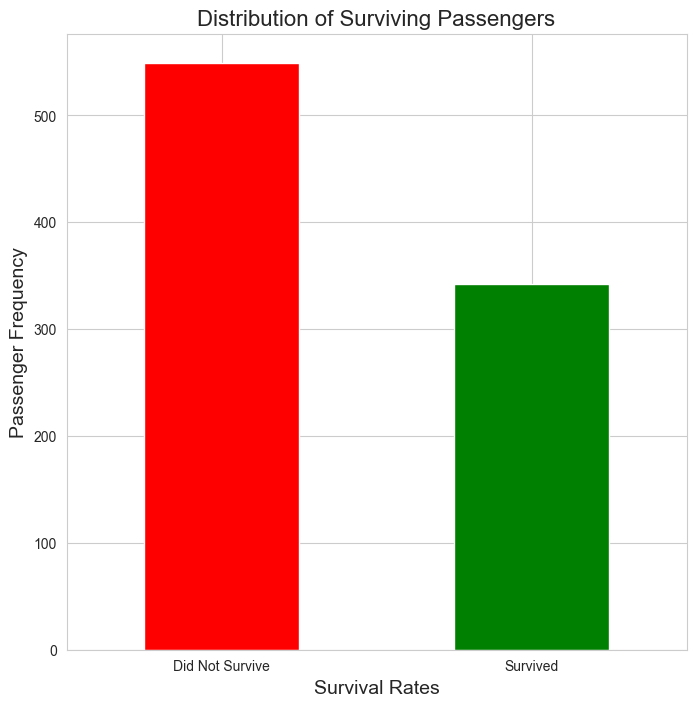

In [6]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
labels = ("Did Not Survive", "Survived")
colors = ["red", "green"]
df["Survived"].value_counts().plot(kind = "bar",  color = colors)
plt.xticks([0, 1], labels, rotation = 0)
plt.xlabel("Survival Rates", fontsize = 14)
plt.ylabel("Passenger Frequency", fontsize = 14)
plt.title("Distribution of Surviving Passengers", fontsize = 16)
plt.show()

Within this dataset, the number of passengers who did not survive account for **1.60x** as many passengers who did survive. Only **38%** of the passengers on board managed to survive the experience, while **62%** died on the Titanic. 

### **B. Age Survival Rate:**

Next we will see which age groups had higher survival rates. We can start by seeing which age groups were most and least present on the Titanic: 

In [7]:
bins = [0, 21, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, np.inf]
ranges = ["<21", "21-25", "26-30", "31-35", "36-40", "41-45", "46-50", "51-55", "56-60", "61-65", "66-70", "70+"]

df["AgeRanges"] = pd.cut(df["Age"], bins, labels=ranges)

(array([  0.,  25.,  50.,  75., 100., 125., 150., 175., 200., 225.]),
 [Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125'),
  Text(0, 150.0, '150'),
  Text(0, 175.0, '175'),
  Text(0, 200.0, '200'),
  Text(0, 225.0, '225')])

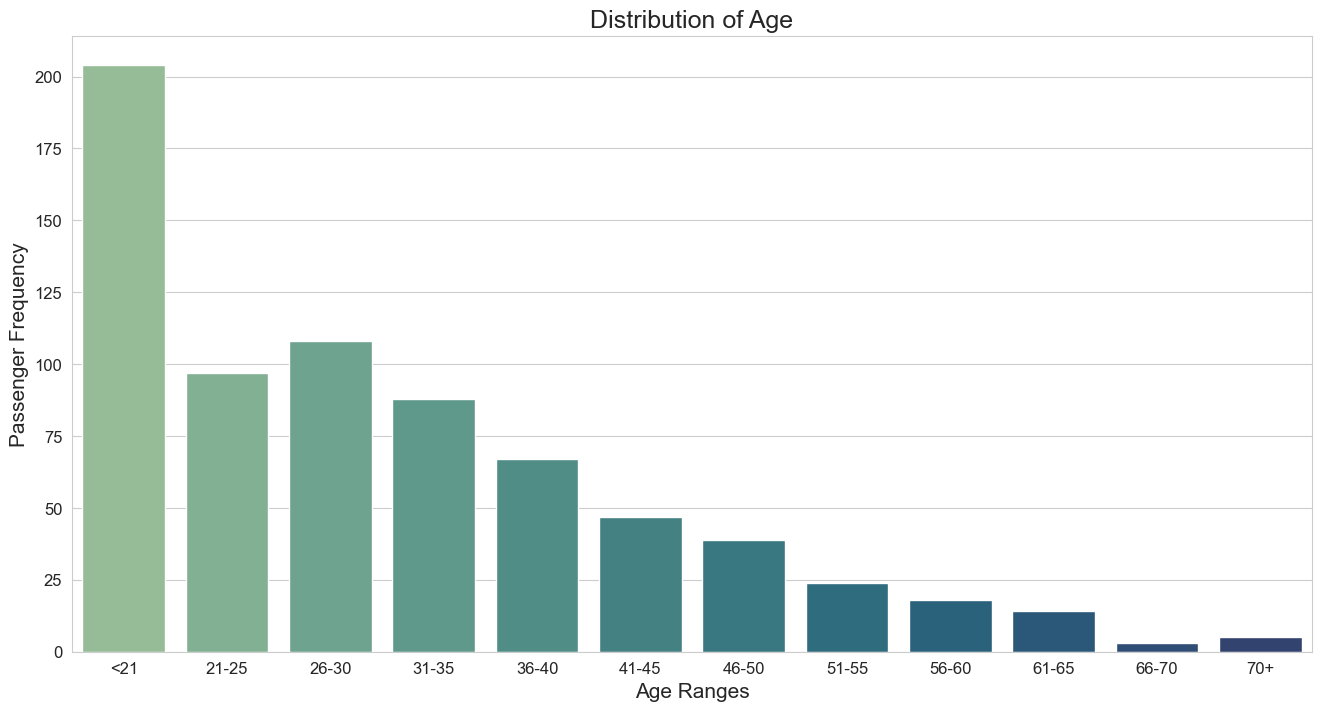

In [8]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.countplot(x=df["AgeRanges"], hue="AgeRanges", data=df, palette="crest", legend=False)
plt.title('Distribution of Age', fontsize = 18)
plt.xlabel('Age Ranges', fontsize = 15)
plt.ylabel('Passenger Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

-   Age range with highest count: **21 and under**
-   Age range with lowest count: **66-70**

Taken from the earlier stats dataframe:

-   Mean age: **30**
-   Minimum age: **5 months**
-   Maximum age: **80**

We can now find the distribution of surviving passengers across age groups, and compute the survival rate by age group.

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 [Text(0, 0.0, '0'),
  Text(0, 20.0, '20'),
  Text(0, 40.0, '40'),
  Text(0, 60.0, '60'),
  Text(0, 80.0, '80'),
  Text(0, 100.0, '100')])

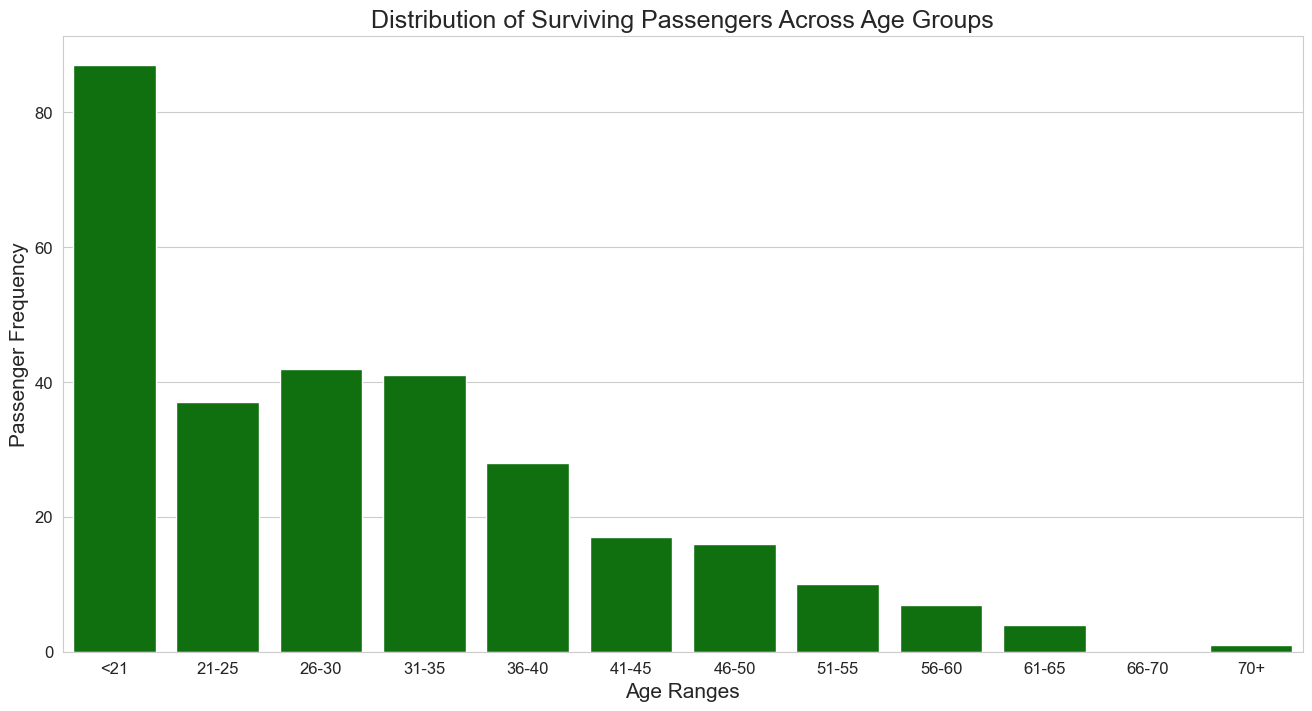

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(16,8))
sns.countplot(x=df[df["Survived"] == 1]["AgeRanges"], data=df, color="Green")
plt.title('Distribution of Surviving Passengers Across Age Groups', fontsize = 18)
plt.xlabel('Age Ranges', fontsize = 15)
plt.ylabel('Passenger Frequency', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [10]:
# Age Survival Rates
df[df["Survived"] == 1]["AgeRanges"].value_counts().sort_index() / df["AgeRanges"].value_counts().sort_index() 

AgeRanges
<21      0.426471
21-25    0.381443
26-30    0.388889
31-35    0.465909
36-40    0.417910
41-45    0.361702
46-50    0.410256
51-55    0.416667
56-60    0.388889
61-65    0.285714
66-70    0.000000
70+      0.200000
Name: count, dtype: float64

Within the context of this dataset:

-   **42.6%** of passengers under 21 survived the Titanic. 
-   **38.1%** of passengers ranging from ages 21 to 25 survived the Titanic. 
-   **38.8%** of passengers ranging from ages 26 to 30 survived the Titanic. 
-   **46.5%** of passengers ranging from ages 31 to 35 survived the Titanic. 
-   **41.8%** of passengers ranging from ages 36 to 40 survived the Titanic. 
-   **36.1%** of passengers ranging from ages 41 to 45 survived the Titanic. 
-   **41%** of passengers ranging from ages 46 to 50 survived the Titanic. 
-   **41.6%** of passengers ranging from ages 51 to 55 survived the Titanic. 
-   **38.8%** of passengers ranging from ages 56 to 60 survived the Titanic. 
-   **28.5%** of passengers ranging from ages 61 to 65 survived the Titanic. 
-   **0%** of passengers ranging from ages 66 to 70 survived the Titanic. 
-   **20%** of passengers over 70 survived the Titanic. 

The data implies that passengers 60 or under had a higher chance of surviving, as the age groups from 21 and under to 56 to 60 had survival rates ranging from **36%** to **46%**. While the age groups from 61 to 65 to 70 and over had survival rates under **30%**. This makes sense as elderly passengers on board would have a much harder time getting to safety after the Titanic hit the iceberg. 

### **C. Gender Survival Rate:**

Now we can see which gender had a higher chance of survival, we can start by finding the distribution of gender among passengers. 

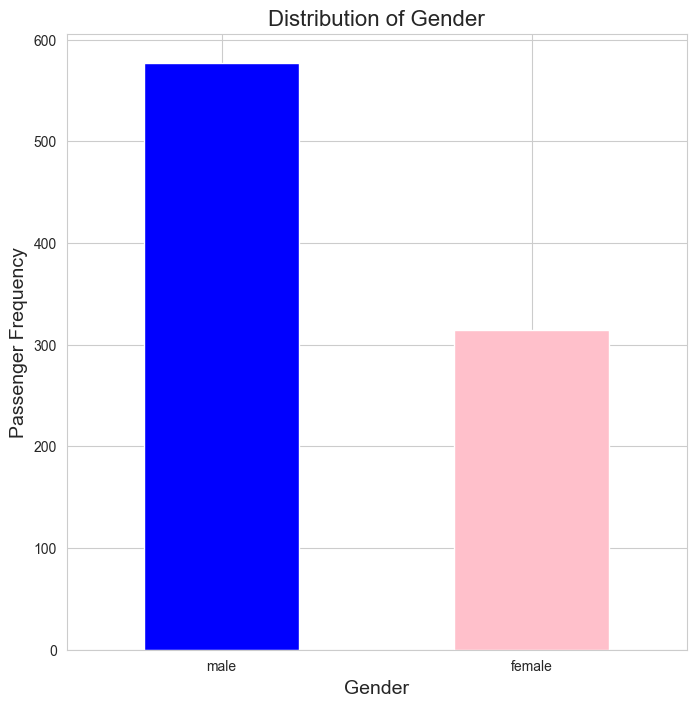

In [11]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
colors = ["blue", "pink"]
df["Sex"].value_counts().plot(kind = "bar",  color = colors)
plt.xticks(rotation = 0)
plt.xlabel("Gender", fontsize = 14)
plt.ylabel("Passenger Frequency", fontsize = 14)
plt.title("Distribution of Gender", fontsize = 16)
plt.show()

-   **65%** of passengers on board were men.
-   **35%** of passengers on board were female. 
-   Within the dataset, males on the Titanic account for **1.83x** as many females on the Titanic.

We can now find the distribution of surviving passengers across genders, and compute the survival rate by gender.

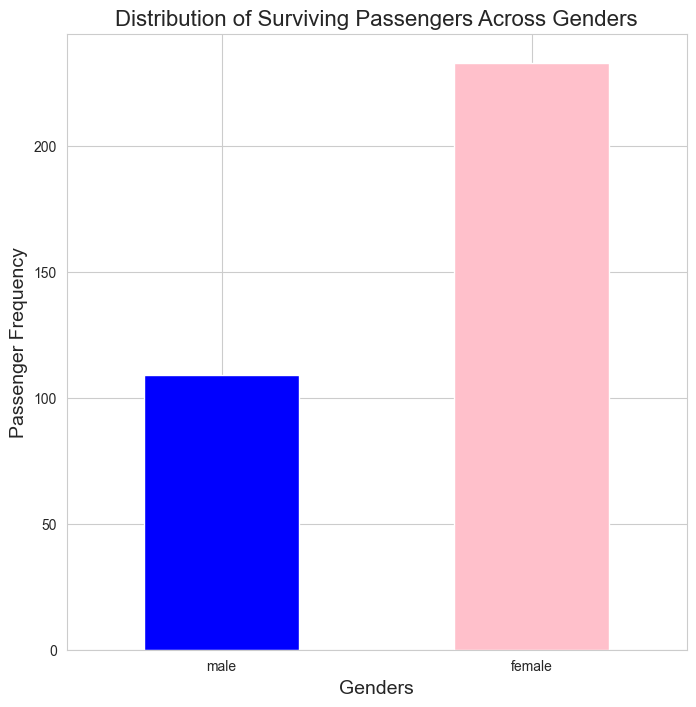

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
colors = ["blue", "pink"]
df[df["Survived"] == 1]["Sex"].value_counts().sort_values(ascending=True).plot(kind = "bar",  color = colors)
plt.xticks(rotation = 0)
plt.xlabel("Genders", fontsize = 14)
plt.ylabel("Passenger Frequency", fontsize = 14)
plt.title("Distribution of Surviving Passengers Across Genders", fontsize = 16)
plt.show()

In [13]:
df[df["Survived"] == 1]["Sex"].value_counts().sort_index() / df["Sex"].value_counts().sort_index()

Sex
female    0.742038
male      0.188908
Name: count, dtype: float64

Within this dataset, **74%** of the females on board survived the Titanic, while only **18%** of males survived the Titanic. It's clear that when the Titanic hit the iceberg, the priority was to get the women on lifeboats first, which aligns with the popular saying: "Women and Children first", that is associated with shipwrecks. 

### **D. Ticket Class Survival Rate:**
The Titanic had three distinct passenger class levels: First Class for the upper class, Second Class for the middle-class, and Third Class for lower class. So we can next find out which ticket class had the higher survival rate. We can start by finding the distribution of ticket class among passengers. 

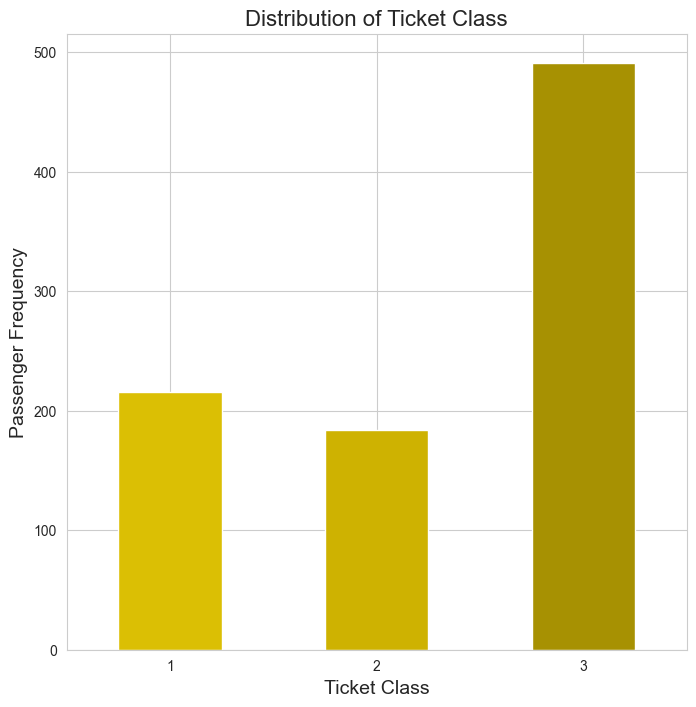

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
colors = ["#DBBF04", "#CEB201","#A79102"]
df["Pclass"].value_counts().sort_index().plot(kind = "bar", color = colors)
plt.xticks(rotation = 0)
plt.xlabel("Ticket Class", fontsize = 14)
plt.ylabel("Passenger Frequency", fontsize = 14)
plt.title("Distribution of Ticket Class", fontsize = 16)
plt.show()

-   First class passengers account for **24%** of the dataset. 
-   Second class passengers account for **21%** of the dataset.
-   Third class passengers account for **55%** of the dataset.

We can next find the distribution of surviving passengers across ticket classes, and compute the survival rate by ticket class.

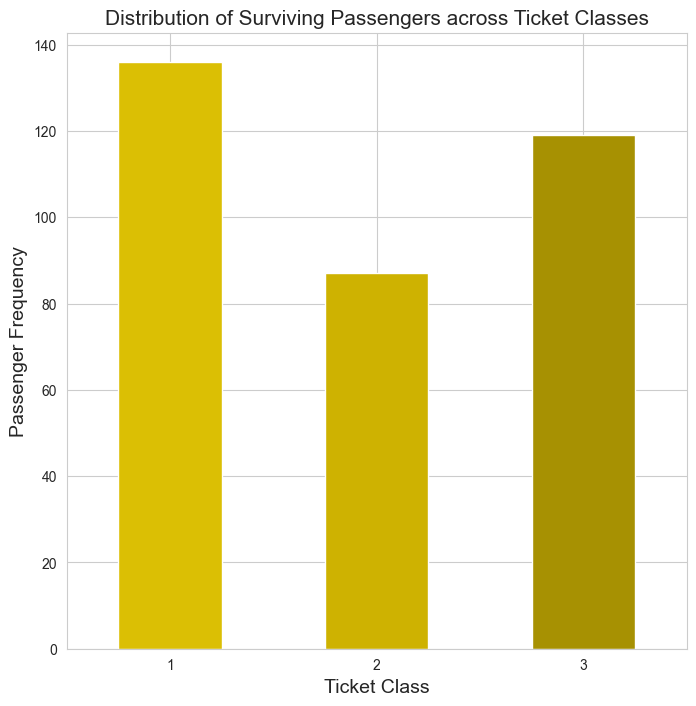

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,8))
colors = ["#DBBF04", "#CEB201","#A79102"]
df[df["Survived"] == 1]["Pclass"].value_counts().sort_index().plot(kind = "bar", color = colors)
plt.xticks(rotation = 0)
plt.xlabel("Ticket Class", fontsize = 14)
plt.ylabel("Passenger Frequency", fontsize = 14)
plt.title("Distribution of Surviving Passengers across Ticket Classes", fontsize = 15)
plt.show()

In [16]:
df[df["Survived"] == 1]["Pclass"].value_counts().sort_index() / df["Pclass"].value_counts().sort_index()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: count, dtype: float64

Within this dataset:

-   **63%** of First class passengers survived the Titanic.
-   **47%** of Second class passengers survived the Titanic. 
-   **24%** of Third class passengers survived the Titanic.

Once the Titanic hit the iceberg, those with higher ticket classes must have had a higher priority when lifeboats were being distributed among passengers, which explains why First class Passengers have the highest survival rate and why Third class Passengers have the lowest.

## **Inferential Analysis**

It seems like the sample data suggests that certain groups of people across different ages, genders and ticket classes, had significantly higher chances of surviving the Titanic than others, we can confirm this was the case for the true population of passengers on the Titanic by applying inferential statistical techniques within the context of this dataset. <br>

Since we computed the survival rates for each category, we will be testing differences in proportions, i.e we will conduct two-proportion Z-tests.

In [17]:
import scipy.stats as stats

### **A. Age:**

The sample suggests that passengers under 60 seem to have higher survival proportions than passengers over 60. We can confirm this was this case for the entire passenger population of the Titanic by conducting a two-proportion Z-test. 

#### **Step 1: Null and Alternative Hypothesis:**

-   Null ***$H_{0}$***: There is no difference in survival proportions between passengers under 60 and passengers over 60.
    -   ***$p_{under-or-equal-to-60}$*** = ***$p_{over-60}$***
-   Alternative ***$H_{a}$***: The survival proportion for passengers under 60 is greater than that for passengers over 60.
    -   ***$p_{under-or-equal-to-60}$*** > ***$p_{over-60}$***

#### **Step 2. Determining Significance Level:**
We will select $\alpha$ = 0.05.    

#### **Step 3. Determining Critical Value and Rejection Region:** 

We need to know when and when not to reject the null hypothesis. To determine this, we find the rejection region, and we can start by finding the critical value.

In [18]:
Zcritical = stats.norm.isf(q = 1-0.95)
print(Zcritical)

1.6448536269514722


We are doing a right tailed Z test where $\alpha$ = 0.05, so our critical value is $Z_{1-0.95}$ = 1.645, which means if our test statistic is between -1.645 and 1.645, we cannot reject the null hypothesis. <br>

If our test statistic is greater than or equal to 1.645 or less than or equal to -1.645, then we reject our null hypothesis. 

#### **Step 4. Calculating Test Statistic:**

We now need to calculate the test statistic, first we need to find the pooled survival proportion of passengers under 60 and the pooled survival proportion of passengers over 60.

In [19]:
p1, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12 = df[df["Survived"] == 1]["AgeRanges"].value_counts().sort_index() / df["AgeRanges"].value_counts().sort_index() 
n1, n2, n3, n4, n5, n6, n7, n8, n9, n10, n11, n12 = df["AgeRanges"].value_counts().sort_index() 

n_under_equal_60 = n1 + n2 + n3 + n4 + n5 + n6 + n7 + n8 + n9
n_over_60 = n10 + n11 + n12

p_under_equal_60 = ((n1 * p1) + (n2 * p2) + (n3 * p3) + (n4 * p4) + (n5 * p5) + (n6 * p6) + (n7 * p7) + (n8 * p8) + (n9 * p9)) / (n_under_equal_60)
p_over_60 = ((n10 * p10) + (n11 * p11) + (n12 * p12)) / (n_over_60)

print(p_under_equal_60)
print(p_over_60)

0.41184971098265893
0.22727272727272727


We now calculate the test statistic, recall that our null hypothesis states: "There is no difference in survival proportions between passengers under 60 and passengers over 60.", so we need to use a pooled proportion:

In [20]:
p = ((p_under_equal_60 * (n_under_equal_60)) + (p_over_60 * (n_over_60))) / (n_under_equal_60 + n_over_60)

Z = (p_under_equal_60 - p_over_60) / np.sqrt(p * (1 - p) * ((1 / n_over_60) + (1 / n_under_equal_60)))
                                            
print(Z)

1.7354380326207444


#### **Step 5. Determine veracity of Null Hypothesis:**

Our test statistic is 1.7354, which is larger than 1.645, thus we reject our null hypothesis, and conclude that the true survival proportion of passengers under 60, is greater than the true survival proportion of passengers over 60.

### **B. Gender:**

The proportion of females who survived the Titanic in this sample is significantly larger than the the proportion of males who survived the Titanic. Lets confirm this was this case for the entire passenger population of the Titanic by conducting a two-proportion Z-test. 

#### **Step 1: Null and Alternative Hypothesis:**

-   Null ***$H_{0}$***: There is no difference in survival proportions between female and male passengers.
    -   ***$p_{female}$*** = ***$p_{male}$***
-   Alternative ***$H_{a}$***: The survival proportion for female passengers is greater than that for male passengers.
    -   ***$p_{female}$*** > ***$p_{male}$***

#### **Step 2. Determining Significance Level:**
We will select $\alpha$ = 0.05.    

#### **Step 3. Determining Critical Value and Rejection Region:** 

We need to know when and when not to reject the null hypothesis. To determine this, we find the rejection region, and we can start by finding the critical value.

In [21]:
Zcritical = stats.norm.isf(q = 1-0.95)
print(Zcritical)

1.6448536269514722


We are doing a right tailed Z test where $\alpha$ = 0.05, so our critical value is $Z_{1-0.95}$ = 1.645, which means if our test statistic is between -1.645 and 1.645, we cannot reject the null hypothesis. <br>

If our test statistic is greater than or equal to 1.645 or less than or equal to -1.645, then we reject our null hypothesis. 

#### **Step 4. Calculating Test Statistic:**

We now need to calculate the test statistic, recall that our null hypothesis states: "There is no difference in survival proportions between female and male passengers", so we need to use a pooled proportion:

In [22]:
p_female, p_male = df[df["Survived"] == 1]["Sex"].value_counts().sort_index() / df["Sex"].value_counts().sort_index()

n_female , n_male = df["Sex"].value_counts().sort_index()

p = ((n_female * p_female) + (n_male * p_male)) / (n_male + n_female)

Z = (p_female - p_male) / np.sqrt(p * (1-p) * ((1 / n_male) + (1/ n_female)))

print(Z)


16.218833930670097


#### **Step 5. Determine veracity of Null Hypothesis:**

Our test statistic is 16, which is larger than 1.645, thus we reject our null hypothesis, and conclude that the true survival proportion of female passengers is greater than the true survival proportion of male passengers.

### **C. Ticket Class:**

The sample data suggests that the proportion of passengers who were in First class and survived the Titanic, is larger than the proportion of passengers who were in Second or Third class and survived the Titanic. We can confirm this was this case for the entire passenger population of the Titanic by conducting a two-proportion Z-test.

#### **Step 1: Null and Alternative Hypothesis:**

-   Null ***$H_{0}$***: There is no difference in survival proportions between passengers in First class and passengers in Second or Third Class.
    -   ***$p_{1}$*** = ***$p_{23}$***
-   Alternative ***$H_{a}$***: The survival proportion for passengers in First class is greater than that for passengers in Second or Third Class.
    -   ***$p_{1}$*** > ***$p_{23}$***

#### **Step 2. Determining Significance Level:**
We will select $\alpha$ = 0.05. 

#### **Step 3. Determining Critical Value and Rejection Region:** 

We need to know when and when not to reject the null hypothesis. To determine this, we find the rejection region, and we can start by finding the critical value.

In [23]:
Zcritical = stats.norm.isf(q = 1-0.95)
print(Zcritical)

1.6448536269514722


We are doing a right tailed Z test where $\alpha$ = 0.05, so our critical value is $Z_{1-0.95}$ = 1.645, which means if our test statistic is between -1.645 and 1.645, we cannot reject the null hypothesis. <br>

If our test statistic is greater than or equal to 1.645 or less than or equal to -1.645, then we reject our null hypothesis. 

#### **Step 4. Calculating Test Statistic:**

We now need to calculate the test statistic, first we need to find the pooled survival proportion of passengers in Second and Third Class. 

In [24]:
p1, p2, p3 = df[df["Survived"] == 1]["Pclass"].value_counts().sort_index() / df["Pclass"].value_counts().sort_index()

n1, n2, n3 = df["Pclass"].value_counts().sort_index()

p23 = ((n2 * p2) + (n3 * p3)) / (n2 + n3)

print(p23)

0.30518518518518517


We now calculate the test statistic, recall that our null hypothesis states: "There is no difference in survival proportions between passengers in First class and passengers in Second or Third Class.", so we need to use a pooled proportion:

In [25]:
p = ((n1 * p1) + (p23 * (n2 + n3))) / (n1 + n2 + n3)

Z = (p1 - p23) / np.sqrt(p * (1-p) * ((1 / n1) + (1 / (n2 + n3))))

print(Z)

8.534119714988172


#### **Step 5. Determine veracity of Null Hypothesis:**

Our test statistic is 8.5341, which is larger than 1.645, thus we reject our null hypothesis, and conclude that the true survival proportion of passengers in First Class, is greater than the true survival proportion of passengers in Second or Third Class.

## **Summary and Conclusion:**

In summary, a passenger who was female, under 60 and in First Class had the highest chance of surviving the Titanic, while a passenger who was male, over 60 and in Third Class had the lowest chance of surviving the Titanic. <br>

To this day, the Titanic is recognized as one of the worst ship-wrecks in human history, resulting in a massive loss of life. The Titanic was widely considered to be "unsinkable", which could have left the crew unprepared for a disaster, leading to those who could have been saved to perish with the ship.